In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import geopandas
import dataretrieval.nwis as nwis
import contextily as cx
import netCDF4 as nc

/opt/miniconda3/lib/python3.9/site-packages/dataretrieval/nadp.py:44: UserWarning: GDAL not installed. Some functions will not work.
  warnings.warn('GDAL not installed. Some functions will not work.')


In [3]:
fn = '../data/VIC_UW/total_flow_remapped.nc'
ds = nc.Dataset(fn)

In [4]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(22645), hru(11723)
    variables(dimensions): int64 time(time), int64 hru(hru), float64 Total_flow(time, hru)
    groups: 


In [5]:
VIC_TotalFlow = ds['Total_flow'][:]

In [6]:
VIC_TotalFlow = pd.DataFrame(VIC_TotalFlow)

AttributeError: 'Rectangle' object has no property 'figsize'

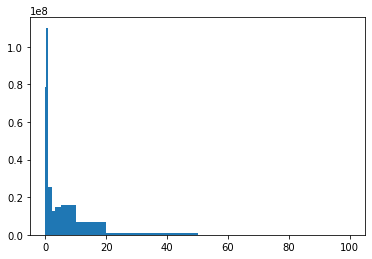

In [7]:
plt.hist(VIC_TotalFlow.to_numpy().flatten(),bins=[0,0.1,1,2,3,5, 10, 20, 50, 100],figsize=(10, 10))
plt.show()

In [11]:
pnw_hydro = geopandas.read_file("../data/VIC_UW/shapefiles/columbia_hru.shp")

pnw_hydro_repro = pnw_hydro.to_crs(epsg=3857)

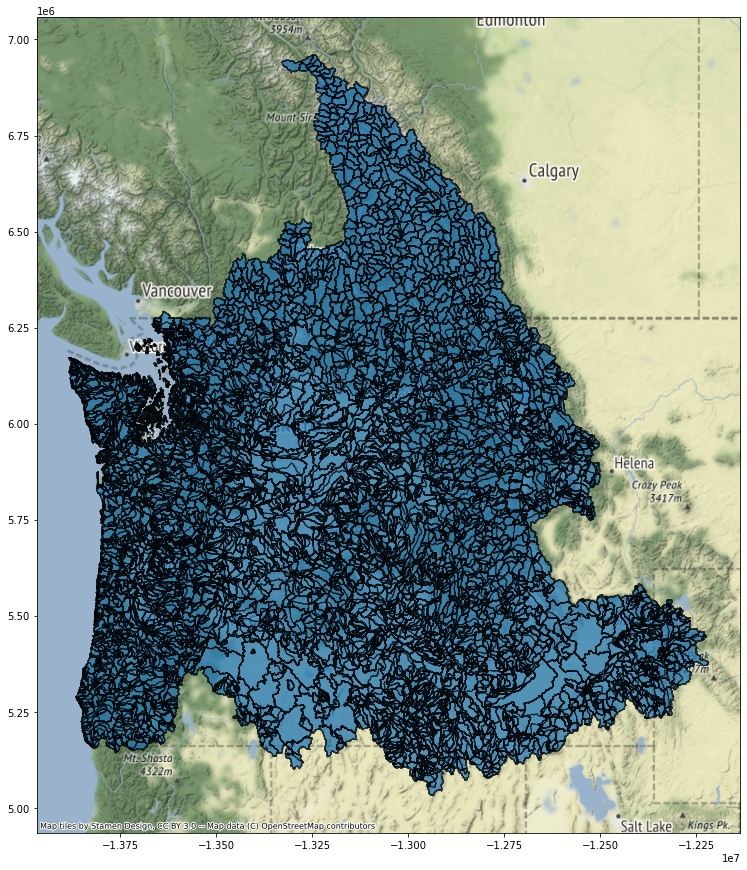

In [13]:
color_map = {'W': 'dodgerblue',
          'V': 'lightskyblue' ,
          'D': 'navajowhite',
          'M': 'powderblue',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

pnw_hydro_repro.plot(ax=ax,legend=True,alpha=.75,edgecolor="black")


cx.add_basemap(ax)